**TEST PROJET LANDMINING DETECTION**

Machine learning test 1

In [7]:
import pandas as pd

# Import des données
file_path = '/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_project_ENSC/Mine_Dataset.csv'

# Lire le dataset
mine_data = pd.read_csv(file_path)

# Visualiser les premières lignes
mine_data.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

mine_data = shuffle(mine_data, random_state=42)

# Découpage des features (V, H, S) et de la cible (M)
X = mine_data[['V', 'H', 'S']]  # Input features: Voltage, Height, Soil type
y = mine_data['M']  # Target: Mine type

# Normaliser les features (Voltage, Height)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Découpage des data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((270, 3), (68, 3), (270,), (68,))

Rapport de classification :
              precision    recall  f1-score   support

           1       0.53      0.91      0.67        11
           2       0.85      0.92      0.88        12
           3       0.44      0.50      0.47        16
           4       0.23      0.27      0.25        11
           5       0.40      0.11      0.17        18

    accuracy                           0.50        68
   macro avg       0.49      0.54      0.49        68
weighted avg       0.48      0.50      0.46        68



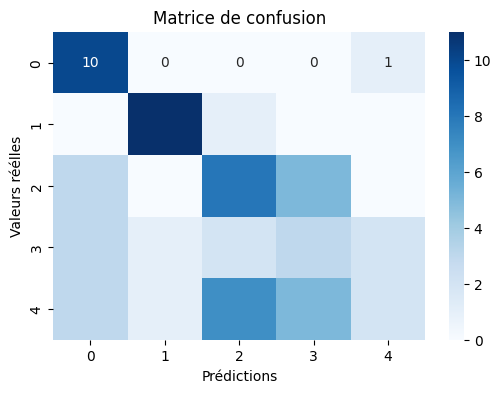

Valeurs uniques de y_test : [1 2 3 4 5]
AUC ROC (multiclass) : 0.78


In [14]:
# Import des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset
data = pd.read_csv('/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_Project_ENSC/Mine_Dataset.csv')

# Prétraitement 
data.fillna(0, inplace=True)

# Séparation des features (X) et de la variable cible (y)
X = data.drop(columns=['M'])  # Remplace 'target' par le nom réel de la variable cible
y = data['M']

# Division en sets d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prédiction
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Valeurs réélles')
plt.xlabel('Prédictions')
plt.show()

print("Valeurs uniques de y_test :", np.unique(y_test))

# Courbe ROC : impossible car multiclasse !

# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Taux de faux-positifs')
# plt.ylabel('Taux de vrai-positifs')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()


# TEST COURBE ROC 

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Binarisation des labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Modèle en mode One-vs-Rest
model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(X_train_scaled, y_train)

# Prédictions des probabilités
y_prob_ovr = model_ovr.predict_proba(X_test_scaled)

# Calcul de l'AUC ROC moyenne sur toutes les classes
roc_auc = roc_auc_score(y_test_bin, y_prob_ovr, average="macro")

print(f"AUC ROC (multiclass) : {roc_auc:.2f}")


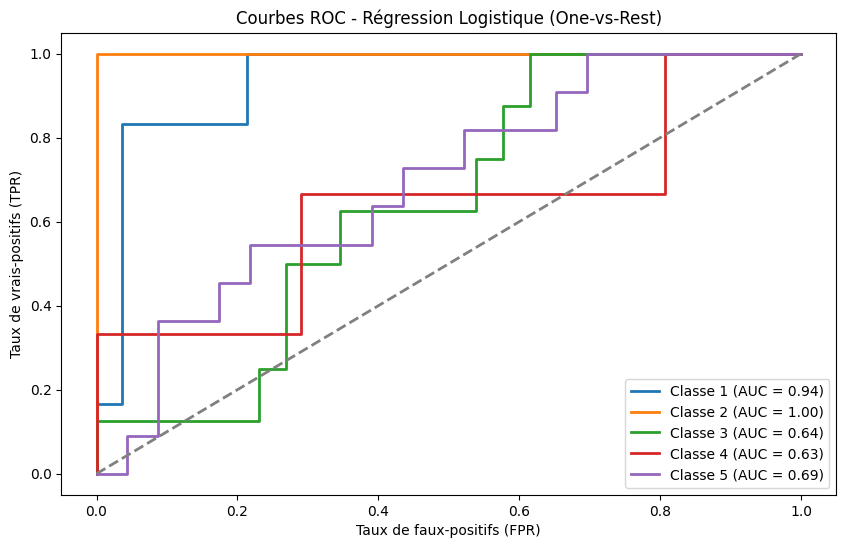

AUC ROC (multiclass) : 0.78


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarisation des labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Modèle en mode One-vs-Rest
model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(X_train_scaled, y_train)

# Prédictions des probabilités
y_prob_ovr = model_ovr.predict_proba(X_test_scaled)

# Calcul des courbes ROC et AUC pour chaque classe
fpr_ovr = {}
tpr_ovr = {}
roc_auc_ovr = {}

for i in range(y_test_bin.shape[1]):
    fpr_ovr[i], tpr_ovr[i], _ = roc_curve(y_test_bin[:, i], y_prob_ovr[:, i])
    roc_auc_ovr[i] = auc(fpr_ovr[i], tpr_ovr[i])

# Affichage de la courbe ROC
plt.figure(figsize=(10, 6))

# Tracer les courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr_ovr[i], tpr_ovr[i], lw=2, label=f'Classe {i+1} (AUC = {roc_auc_ovr[i]:.2f})')

# Tracer la diagonale aléatoire (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Personnalisation du graphique
plt.title('Courbes ROC - Régression Logistique (One-vs-Rest)')
plt.xlabel('Taux de faux-positifs (FPR)')
plt.ylabel('Taux de vrais-positifs (TPR)')
plt.legend(loc="lower right")

# Afficher le graphique
plt.show()

# AUC ROC moyenne pour toutes les classes
roc_auc_macro = roc_auc_score(y_test_bin, y_prob_ovr, average="macro")
print(f"AUC ROC (multiclass) : {roc_auc_macro:.2f}")

Machine learning test 2

In [15]:
# Affiche les noms des colonnes pour identifier la colonne cible
print(data.columns)

Index(['V', 'H', 'S', 'M'], dtype='object')


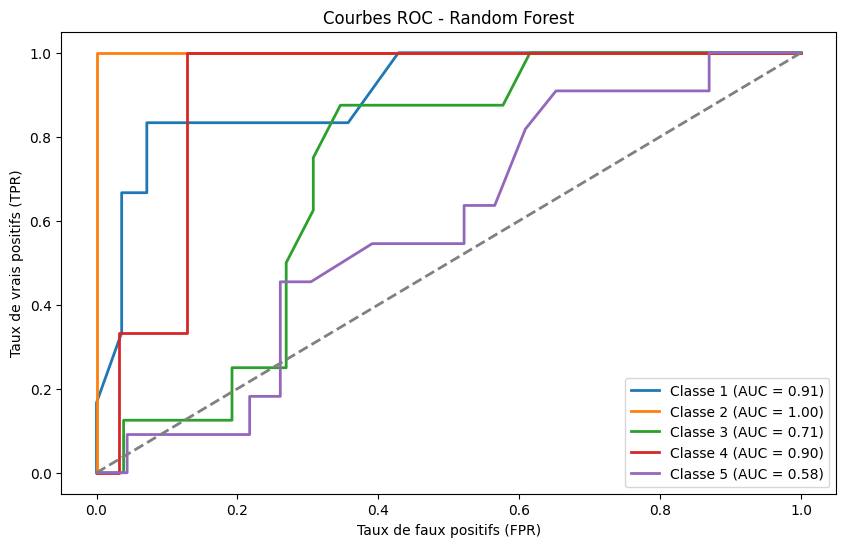

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Calcul des probabilités pour chaque classe
y_prob_rf = rf_model.predict_proba(X_test)

# 2. Binarisation des labels pour chaque classe (pour multi-classe)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])

# 3. Calcul des courbes ROC et AUC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Affichage de la courbe ROC
plt.figure(figsize=(10, 6))

# Tracer les courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Classe {i+1} (AUC = {roc_auc[i]:.2f})')

# Tracer la diagonale aléatoire (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Personnalisation du graphique
plt.title('Courbes ROC - Random Forest')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend(loc="lower right")

# Afficher le graphique
plt.show()

Premières lignes du dataset :
             0            1  2  3
0            V            H  S  M
1  0.338156758            0  0  1
2  0.320241334  0.181818182  0  1
3   0.28700875  0.272727273  0  1
4  0.256283622  0.454545455  0  1

Types des données avant correction :
0    object
1    object
2    object
3    object
dtype: object

Valeurs manquantes par colonne :
V    1
H    1
S    1
M    1
dtype: int64

Rapport de classification pour la régression logistique :
              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77         6
         2.0       0.86      1.00      0.92         6
         3.0       0.40      0.50      0.44         8
         4.0       0.20      0.67      0.31         3
         5.0       0.00      0.00      0.00        11

    accuracy                           0.50        34
   macro avg       0.43      0.60      0.49        34
weighted avg       0.39      0.50      0.43        34


Rapport de classification pour le Random F

/Users/debidour/Library/Caches/pypoetry/virtualenvs/landmining-project-ensc-DKMooyQ--py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debidour/Library/Caches/pypoetry/virtualenvs/landmining-project-ensc-DKMooyQ--py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/debidour/Library/Caches/pypoetry/virtualenvs/landmining-project-ensc-DKMooyQ--py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-d

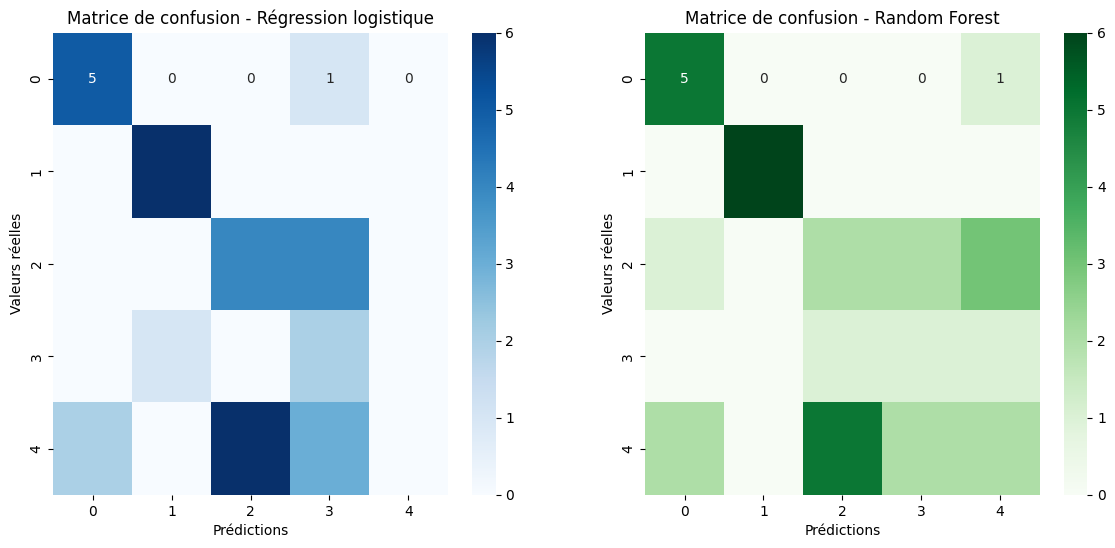

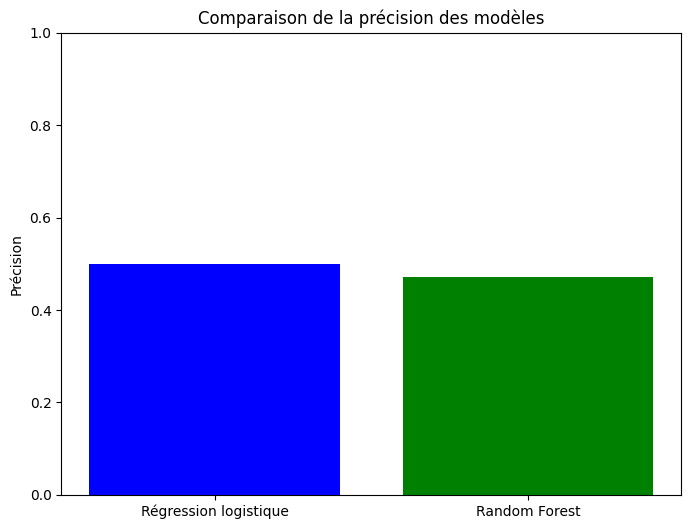

In [17]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Chargement des données
data = pd.read_csv('/Users/debidour/Desktop/ENSC/PERSONNEL/3A/Landmining_project_ENSC/Mine_Dataset.csv', header=None)

# Vérification des premières lignes du jeu de données
print("Premières lignes du dataset :")
print(data.head())

# Vérification du type des données dans chaque colonne
print("\nTypes des données avant correction :")
print(data.dtypes)

# Définir les noms de colonnes, selon l'image fournie (V: Voltage, H: Height, S: Soil Type, M: Mine Type)
data.columns = ["V", "H", "S", "M"]

# Conversion explicite des colonnes en types numériques
data['V'] = pd.to_numeric(data['V'], errors='coerce')
data['H'] = pd.to_numeric(data['H'], errors='coerce')
data['S'] = pd.to_numeric(data['S'], errors='coerce')
data['M'] = pd.to_numeric(data['M'], errors='coerce')

# Vérification des valeurs manquantes (NaN) après conversion
print("\nValeurs manquantes par colonne :")
print(data.isna().sum())

# Suppression des lignes contenant des valeurs manquantes
data = data.dropna()

# 2. Séparation des features (X) et de la variable cible (y)
X = data[["V", "H", "S"]]
y = data["M"]

# 3. Division en sets d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 4. Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Création et entraînement de modèles de Machine Learning
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# 6. Prédictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf_clf = rf_clf.predict(X_test_scaled)

# 7. Évaluation des modèles
print("\nRapport de classification pour la régression logistique :")
print(classification_report(y_test, y_pred_log_reg))

print("\nRapport de classification pour le Random Forest :")
print(classification_report(y_test, y_pred_rf_clf))

# 8. Matrice de confusion pour chaque modèle
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)

# Affichage des matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matrice de confusion - Régression logistique')
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')

sns.heatmap(conf_matrix_rf_clf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matrice de confusion - Random Forest')
axes[1].set_xlabel('Prédictions')
axes[1].set_ylabel('Valeurs réelles')

plt.show()

# 9. Comparaison des performances avec des barres de précision
accuracy_log_reg = log_reg.score(X_test_scaled, y_test)
accuracy_rf_clf = rf_clf.score(X_test_scaled, y_test)

# Affichage des résultats de précision
models = ['Régression logistique', 'Random Forest']
accuracies = [accuracy_log_reg, accuracy_rf_clf]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.title("Comparaison de la précision des modèles")
plt.ylabel("Précision")
plt.show()

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Fully Connected Neural Network
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3,)),  # Input layer (3 features)
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # Output layer pour 5 classes (Mine types)
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

test_accuracy


ModuleNotFoundError: No module named 'tensorflow'